<a href="https://colab.research.google.com/github/davidyr23/Fisicacomputacional1/blob/master/Actividad34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Preparamos los datos y bibliotecas a utilizar**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Para calcular las estacionalidad, tendencia y residuo 
import statsmodels.api as sm

In [37]:
url = "https://raw.githubusercontent.com/davidyr23/Fisicacomputacional1/master/Actividad1/climatologiaBadiraguato.txt"

# Nombramos las columnas del df
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']

# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Bricamos los primeros 19 renglones y el último (skiprows), afirmamos que no nay encabezado (header=None)
# Proceamos los datos utilizando Python, engine='python' 

df_badiraguato = pd.read_csv(url, names=my_cols, encoding="cp1251", sep="\s+", header=None, skiprows=19, skipfooter=1, engine="python")
# df_badiraguato

# Observamos el encabezado y el final de los datos
# print(df_badiraguato.head())
# print(df_badiraguato.tail())

# Observamos la dimensión de los datos
# df_badiraguato.shape

# Observamos la información de los datos
# df_badiraguato.info()

# Se realiza una copia con la que trabajar para no perder el origigi
df_c=df_badiraguato.copy()


# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_c = df_c.replace(to_replace=str_Nulo, value='', regex=True)
# df_c.head()

# Imprimimos la info actualizada del df
# df_c.info()
# print(df_c.head())

# Procedemos a convertir los datos del badiraguato a valores numericos para poder trabajar los datos
columnas = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in columnas:
  df_c[cols] = pd.to_numeric(df_c[cols], errors="coerce")


# Observamos que datos faltan
# df_c.isnull().sum()

# Realizamos un breve analísis estadistico redondeado a 2 cifras.
# df_c.describe().round(2)

# Nueva copia de seguridad
df_c1 = df_c.copy()

# Asignamos formato de fecha: (.copy necesario pq sino la hace de pancho)
df_c1["Fecha"] = pd.to_datetime(df_c1["Fecha"], dayfirst=True ).copy()

# Añadimos las columnas de año y mes ademas de la de fecha
df_c1["Año"] = df_c1["Fecha"].dt.year
df_c1["Mes"] = df_c1["Fecha"].dt.month


# Observamos una muestra aleatoria de 10 renglones
# df_c1.sample(10)

# Eliminamos el formato numerico para el mes y se le coloca un formato de caracteres
# df_c1.drop nos sirve para elimnar la columna
df_c1.drop("Mes", axis=1, inplace=True)
# .dt.strftime es el comando que hace el cambio
df_c1["Mes"] = df_c1["Fecha"].dt.strftime("%b")

#**Creamos la Serie de Tiempo**

In [3]:
# checkpoint
df_c2=df_c1.copy()

# Se redefine el indice de todo el DataFrame para que sea la fecha en vez de un contador.
df_c2 = df_c2.set_index("Fecha")

# Verificación
print(df_c2.head())
# print(df_c1.head())

            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1960-01-01     0.0   NaN   NaN   NaN  1960  Jan
1960-01-02     0.0   NaN   NaN   NaN  1960  Jan
1960-01-03     6.0   NaN   NaN   NaN  1960  Jan
1960-01-04    30.0   NaN   NaN   NaN  1960  Jan
1960-01-05     0.0   NaN   NaN   NaN  1960  Jan


In [4]:
# La base de datos de Badiraguato comienza en 1960 y finaliza en 2018, precisamente este rango de datos es de interes pues queremos analizar los ultimos 30 años.
# Dado lo anterior el rango de datos será: 1988 - 2018
df_muestra = df_c2[(df_c2["Año"] >= 1988) & (df_c2["Año"] <= 2018)]
df_muestra

,Precip,Evap,Tmax,Tmin,Año,Mes
Fecha,,,,,,
1988-01-01,0.0,2.4,30.0,11.0,1988,Jan
1988-01-02,0.0,2.7,31.0,10.0,1988,Jan
1988-01-03,0.0,2.9,32.0,9.0,1988,Jan
1988-01-04,0.0,3.2,34.0,10.0,1988,Jan
1988-01-05,0.0,3.3,34.0,9.0,1988,Jan
...,...,...,...,...,...,...
2018-04-26,0.0,NaN,41.0,14.0,2018,Apr
2018-04-27,0.0,NaN,39.0,15.0,2018,Apr
2018-04-28,0.0,NaN,36.0,16.0,2018,Apr


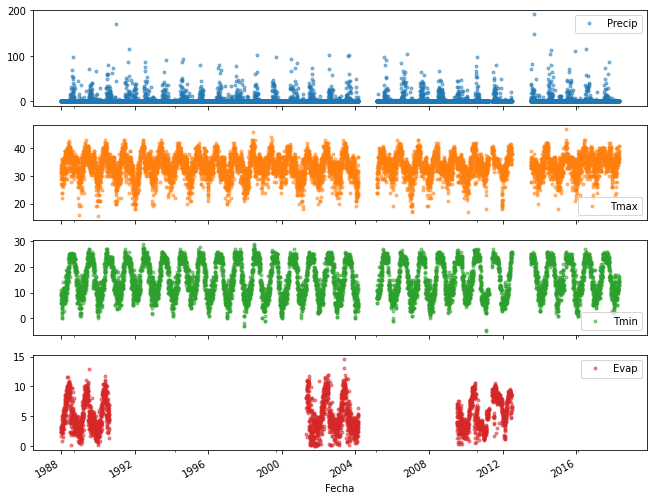

In [5]:
# Gracias que se cambio el indice a la fecha podemos crear la sig serie de tiempo, para cuatro variables:
column = ["Precip", "Tmax", "Tmin", "Evap"]
ax_y = ["Precip (mm)", "Evap (mm)", "Tmax (ºC)", "Tmin (ºC)"]

# marker (como se marcan los puntos), alpha ()
ejes = df_muestra[column].plot(marker=".", alpha=0.5, linestyle ="None", figsize=(11,9), subplots=True)

#**Actividad 1: Exploramos los datos de precipitación**

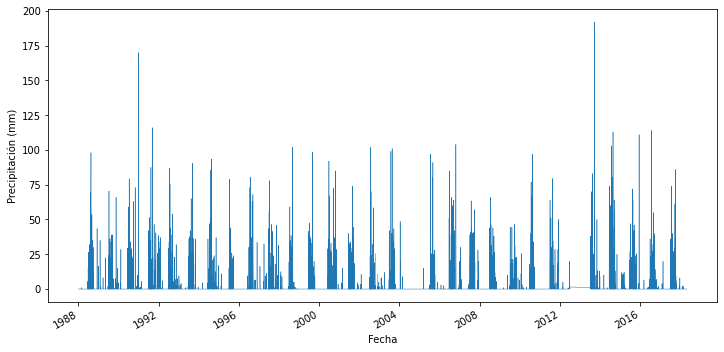

In [6]:
# Ahora se grafica la precipitación en los ulitmos 30 años:
# sns.set(rc={'figure.figsize':(12, 6)})
plt.figure(figsize=(12,6))
plt.ylabel("Precipitación (mm)")
df_muestra["Precip"].plot(linewidth=0.5);

precip_prom=df_muestra["Precip"].mean()
#print(precip_prom)

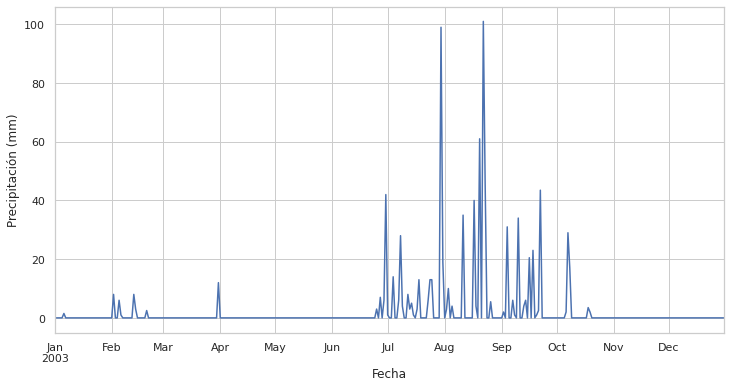

In [7]:
# Analizando un año de datos:
sns.set(rc={'figure.figsize':(12, 6)}, style="whitegrid")
df_muestra.loc["2003", "Precip"].plot().set_ylabel("Precipitación (mm)");
# plt.ylabel("Precipitación (mm)"), tambien vale.

# Una manera alterna es asignando una variable a la grafica para despues aplicar sobre la variable el .set_ylabel
# graf= df_muestra.loc["2003", "Precip"].plot()
# graf.set_ylabel("Precipitación (mm)")

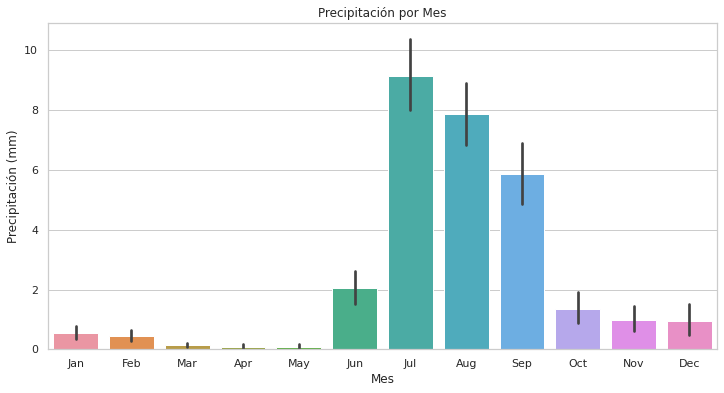

In [8]:
# Para observar la estacionalidad de los datos de precipitación se grafican por mes:
sns.set_style("whitegrid")
sns.barplot(data=df_muestra, y="Precip", x="Mes");
plt.ylabel("Precipitación (mm)");
plt.title("Precipitación por Mes");

#**Actividad 2: Exploramos los datos de temperatura máxima y mínima**

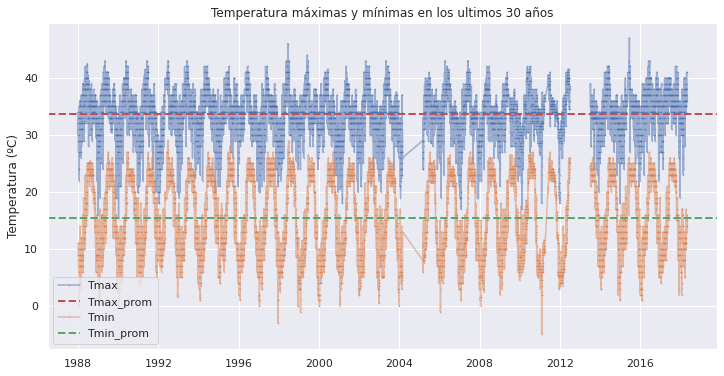

In [9]:
# Calculando Tmax y Tmin promedio.
#tmax_prom=df_muestra.Tmax.mean()
#tmin_prom=df_muestra.Tmin.mean()


sns.set(rc={'figure.figsize':(12, 6)})
grafica, fig = plt.subplots()
for x in ["Tmax", "Tmin"]:
  fig.plot(df_muestra[x], marker='.', markersize=1, linestyle='-', alpha=0.5, label=x)
  if x == "Tmax":
    plt.axhline(y=df_muestra[x].mean(), color="r", linestyle="--", linewidth=2, label="Tmax_prom")
  else:
    plt.axhline(y=df_muestra[x].mean(), color="g", linestyle="--", linewidth=2, label="Tmin_prom")

fig.legend()

fig.set_ylabel("Temperatura (ºC)")
fig.set_title("Temperatura máximas y mínimas en los ultimos 30 años");

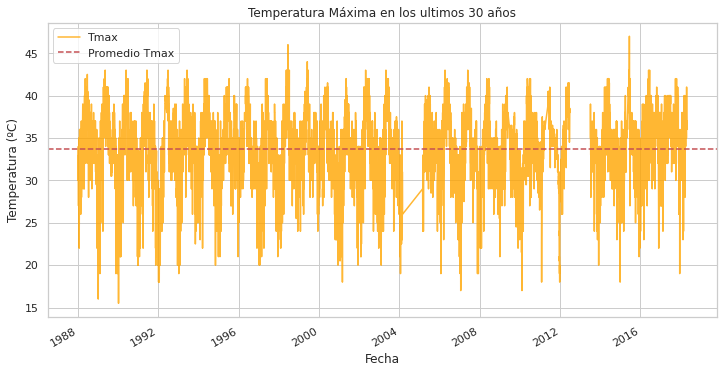

In [10]:
# Graficas individuales para Tmax y Tmin
sns.set_style("whitegrid")
tma = df_muestra.Tmax.plot(alpha=0.8, figsize=(12,6), color="orange")
plt.axhline(y=df_muestra.Tmax.mean(), color="r", linestyle="--", label="Promedio Tmax")
tma.set_ylabel("Temperatura (ºC)")

plt.legend()
plt.title("Temperatura Máxima en los ultimos 30 años");

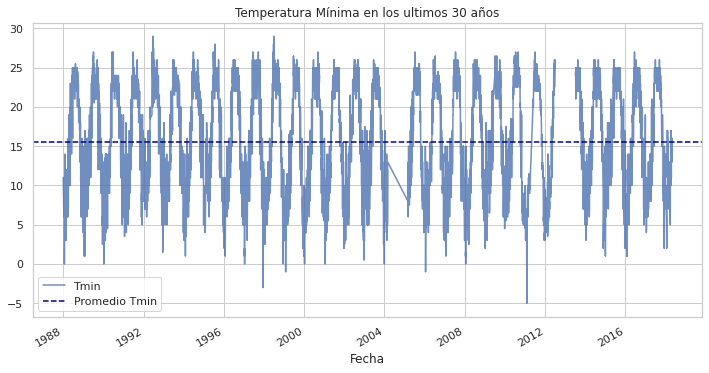

In [11]:
# Grafica individual para tmin
sns.set_style("whitegrid")
tmi = df_muestra.Tmin.plot(alpha=0.8, figsize=(12,6), color="b")
plt.axhline(y=df_muestra.Tmin.mean(), color="navy", linestyle="--", label="Promedio Tmin")
tma.set_ylabel("Temperatura (ºC)")
plt.legend()
#tma.set_title("Temperatura Mínima en los ultimos 30 años");
plt.title("Temperatura Mínima en los ultimos 30 años");

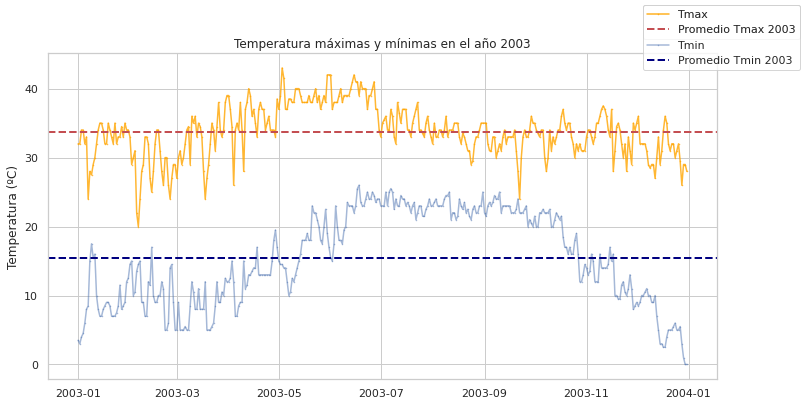

In [12]:
# Analizando un año de datos para tmin y tmax:
#sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12, 6)}, style="whitegrid")

start, end ="2003-01", "2003-12"
fig, graf = plt.subplots()
for x in ["Tmax", "Tmin"]:
  if x == "Tmax":
    graf.plot(df_muestra.loc[start:end, x], marker='.', markersize=1, linestyle='-', alpha=0.8, label=x, color="orange")
    plt.axhline(y=df_muestra.loc[start:end, x].mean(), color="r", linestyle="--", linewidth=2, label="Promedio Tmax 2003")
  else:
    graf.plot(df_muestra.loc[start:end, x], marker='.', markersize=1, linestyle='-', alpha=0.5, label=x, color="b")
    plt.axhline(y=df_muestra.loc[start:end, x].mean(), color="navy", linestyle="--", linewidth=2, label="Promedio Tmin 2003")
  fig.legend()
  plt.ylabel("Temperatura (ºC)")
  plt.title("Temperatura máximas y mínimas en el año 2003");
  plt.xlim()
  #plt.xlim("2003-01-01", "2003-12-31")

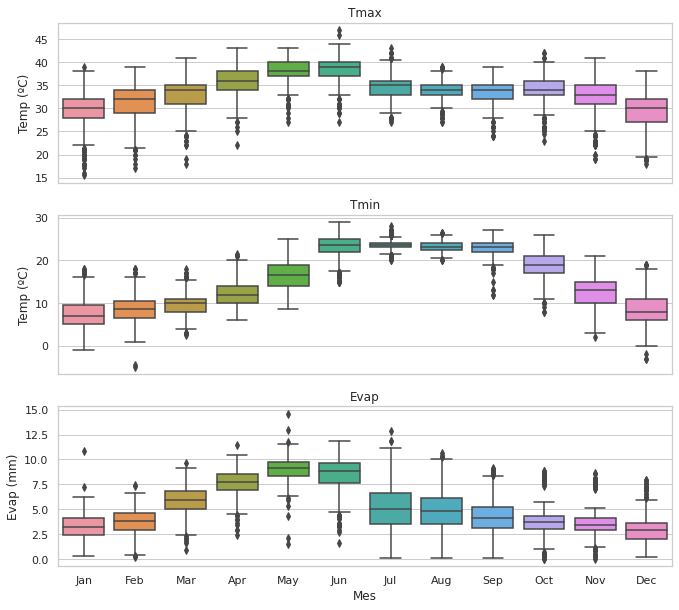

In [13]:
# Graficando la estacionalidad de los datos mediante boxplot:
# Se incluye de una vez un boxplot para evaporacion.
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Tmax', 'Tmin', 'Evap'], axes):
  sns.boxplot(data=df_muestra, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temp (ºC)')
  else: 
    ax.set_ylabel('Evap (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

#**Actividad 3: Exploramos los datos de la evaporación**

La evaporación promedio es: 5.211267605633813


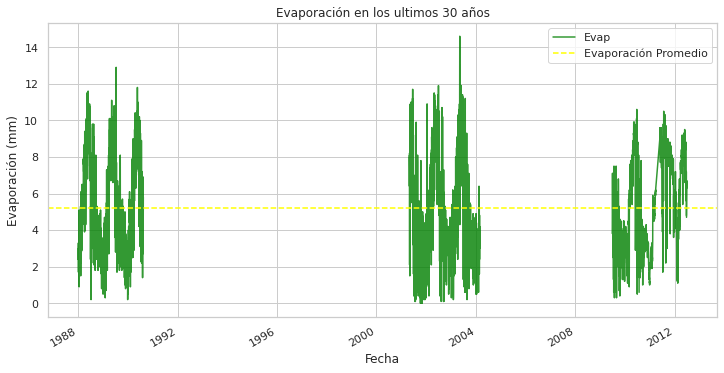

In [14]:
sns.set_style("whitegrid")

a = df_muestra.Evap.plot(alpha=0.8, figsize=(12,6), color="green")
plt.axhline(y=df_muestra.Evap.mean(), linestyle="--", color="yellow", label="Evaporación Promedio")
a.set_ylabel("Evaporación (mm)")
a.set_title("Evaporación en los ultimos 30 años")
plt.legend();
print(f"La evaporación promedio es: {df_muestra.Evap.mean()}")

La evaporación promedio en 2003 es: 5.169315068493156


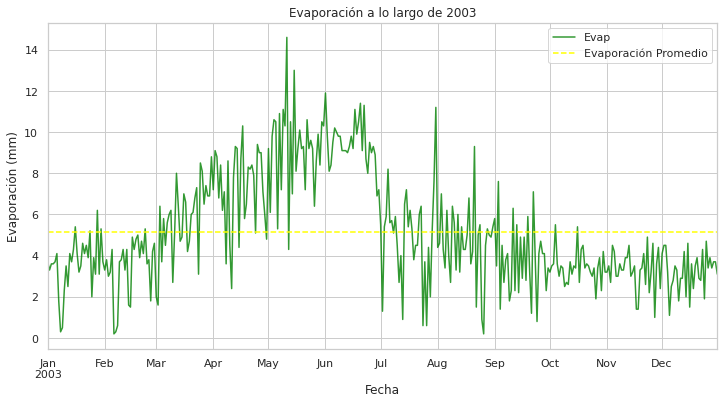

In [15]:
# Evaporación en el año 2005
sns.set_style("whitegrid")

b = df_muestra.loc["2003", "Evap"].plot(alpha=0.8, figsize=(12,6), color="green")
plt.axhline(y=df_muestra.loc["2003", "Evap"].mean(), linestyle="--", color="yellow", label="Evaporación Promedio");

b.set_ylabel("Evaporación (mm)")
b.set_title("Evaporación a lo largo de 2003")
plt.legend();
pprom=df_muestra.loc["2003", "Evap"].mean()
print(f"La evaporación promedio en 2003 es: {pprom}")

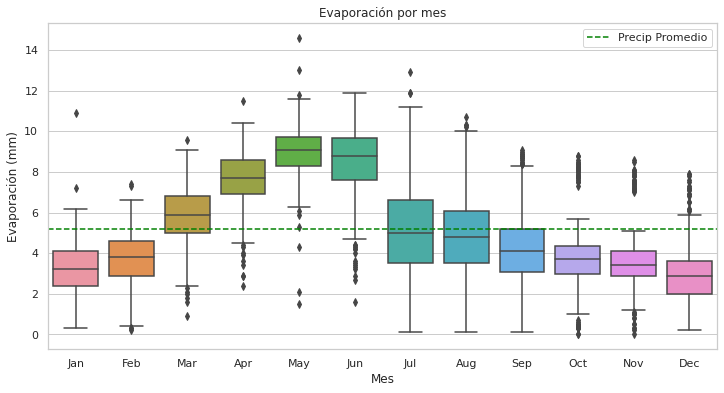

In [16]:
# El boxplot para evaporación ya se mostro en la actividad dos pero aqui va de nuevo:
sns.set(rc={'figure.figsize':(12, 6)}, style="whitegrid")
c = sns.boxplot(data=df_muestra, x="Mes", y="Evap",);
c.set_title("Evaporación por mes")
c.set_ylabel("Evaporación (mm)")
plt.axhline(y=df_muestra.Evap.mean(), color="green", linestyle="--", label= "Precip Promedio")
plt.legend();

#**Actividad 4: Analizamos los datos con promedios moviles**

In [17]:
# Suavizando curvas:

columnas=["Evap","Tmax","Tmin"]

df7=df_muestra[columnas].rolling(7, center=True, min_periods=1).mean()
df30=df_muestra[columnas].rolling(30, center=True, min_periods=1).mean()
df365=df_muestra[columnas].rolling(365, center=True, min_periods=1).mean()

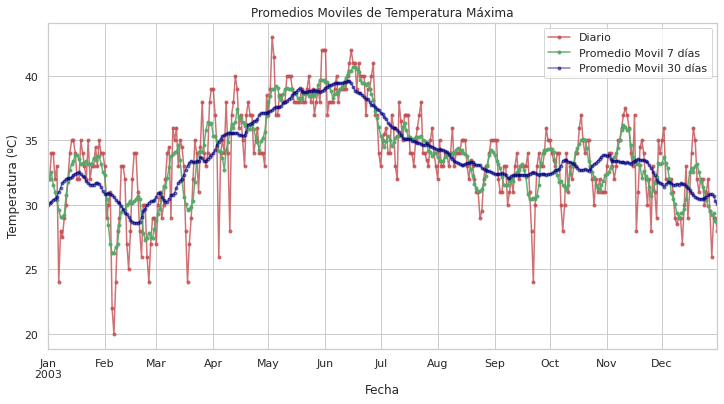

In [18]:
# Gráfica para temperatura máxima de un año y contrastando con promedio movil a 7 dias y 30 dias:
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

df_muestra.loc["2003", "Tmax"].plot(alpha=0.8, color="r", marker=".", label="Diario");
df7.loc["2003", "Tmax"].plot(alpha=0.9, color="g", marker=".", label="Promedio Movil 7 días");
df30.loc["2003","Tmax"].plot(alpha=0.5, marker=".", color="navy", label="Promedio Movil 30 días")
plt.legend()
plt.ylabel("Temperatura (ºC)")
plt.title("Promedios Moviles de Temperatura Máxima");

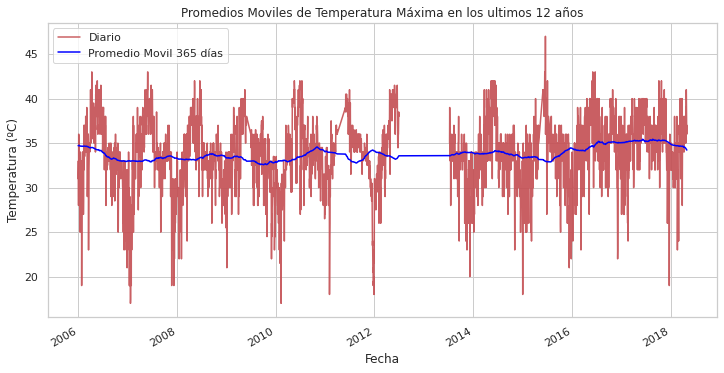

In [19]:
# Grafica de prom moviles a 365 años contra datos diarios de los ultimos 12 años
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid");

df_muestra.loc["2006":"2018", "Tmax"].plot(alpha=0.9, color="r", label= "Diario");
df365.loc["2006":"2018", "Tmax"].plot(alpha=1, color="blue", label="Promedio Movil 365 días", linestyle="-");

plt.legend()
plt.title("Promedios Moviles de Temperatura Máxima en los ultimos 12 años")
plt.ylabel("Temperatura (ºC)");

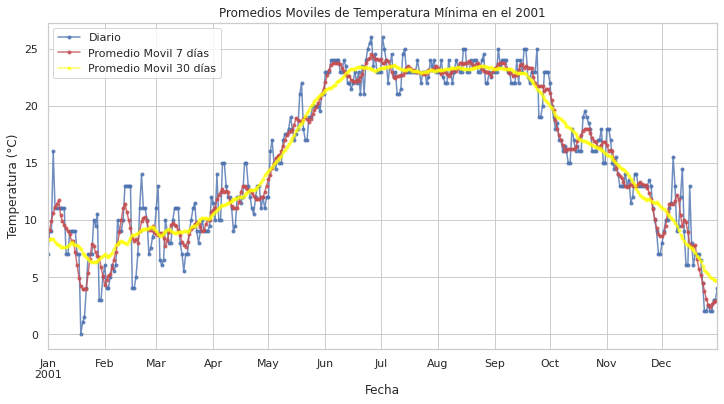

In [20]:
# Ahora, para el caso de la temperatura minima se repite lo mismo.
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

df_muestra.loc["2001", "Tmin"].plot(alpha=0.8, color="b", marker=".", label="Diario")
df7.loc["2001", "Tmin"].plot(alpha=0.8, color="r", marker=".", label="Promedio Movil 7 días");
df30.loc["2001", "Tmin"].plot(alpha=0.6, color="yellow", marker=".", label="Promedio Movil 30 días");

plt.legend()
plt.ylabel("Temperatura (°C)")
plt.title("Promedios Moviles de Temperatura Mínima en el 2001");

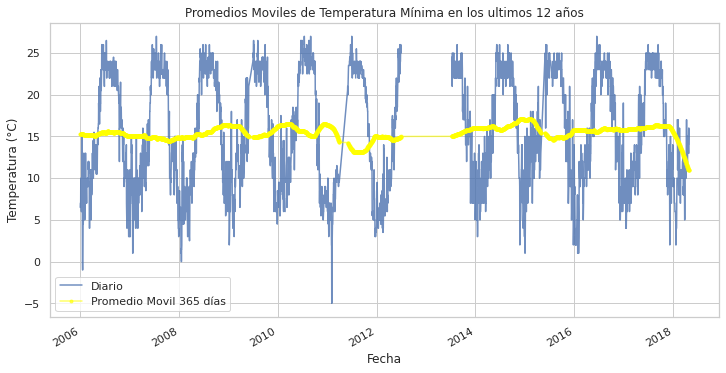

In [21]:
# Ultimos 12 años de Tmin y prom movil de 365 días;
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

df_muestra.loc["2006":"2018", "Tmin"].plot(alpha=0.8, color="b", label="Diario")
df365.loc["2006":"2018", "Tmin"].plot(alpha=0.6, color="yellow", marker=".", label="Promedio Movil 365 días")

plt.title("Promedios Moviles de Temperatura Mínima en los ultimos 12 años")
plt.ylabel("Temperatura (°C)");
plt.legend();

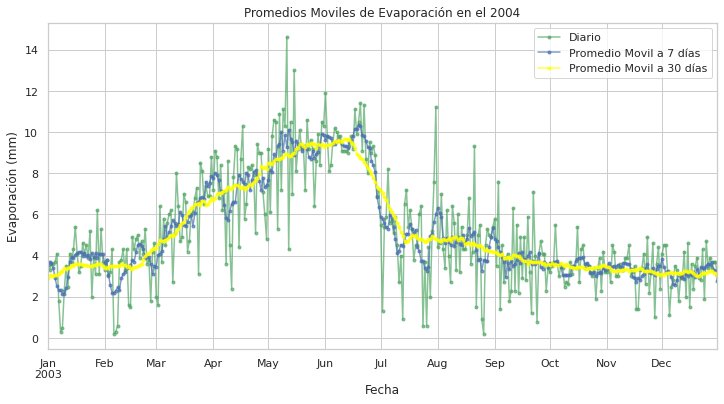

In [22]:
# Se repite lo anterior para la evaporación
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")
x="2003"
df_muestra.loc[x, "Evap"].plot(alpha=0.7, color="g", marker=".", label="Diario")
df7.loc[x, "Evap"].plot(alpha=0.7, color="b", marker=".", label="Promedio Movil a 7 días")
df30.loc[x, "Evap"].plot(alpha=0.7, color="yellow", marker=".", label="Promedio Movil a 30 días")

plt.title("Promedios Moviles de Evaporación en el 2004")
plt.ylabel("Evaporación (mm)")
plt.legend();

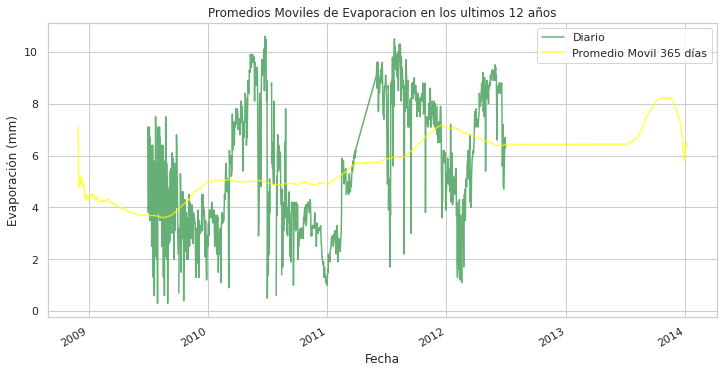

In [23]:
# Evaporacion y prom moviles en los ultimos 12 años:
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

df_muestra.loc["2006":"2018", "Evap"].plot(alpha=0.9, color="g", label="Diario")
df365.loc["2006":"2018", "Evap"].plot(alpha=0.7, color="yellow", label="Promedio Movil 365 días")

plt.title("Promedios Moviles de Evaporacion en los ultimos 12 años")
plt.ylabel("Evaporación (mm)")
plt.legend();

#**Actividad 5: Descomponemos las series de tiempo utilizando la biblioteca "statsmodels.tsa".**

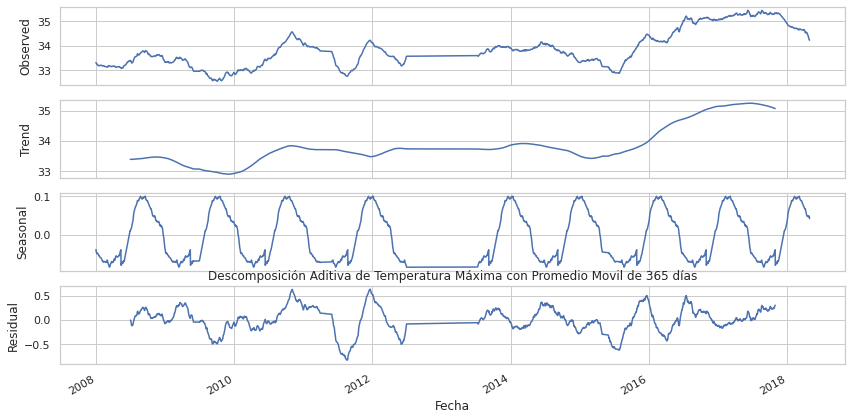

In [30]:
# Descomposición de Series de Tiempo para Tmax
# Uso de la biblioteca 'statsmodel'
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

# Rango de datos
st, end = "2008", "2018"

# Ciclo anual
freq1=365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
g = sm.tsa.seasonal_decompose(df365.loc[st:end, "Tmax"].interpolate(), freq=freq1, model="additive" )
g.plot()
plt.title("Descomposición Aditiva de Temperatura Máxima con Promedio Movil de 365 días");

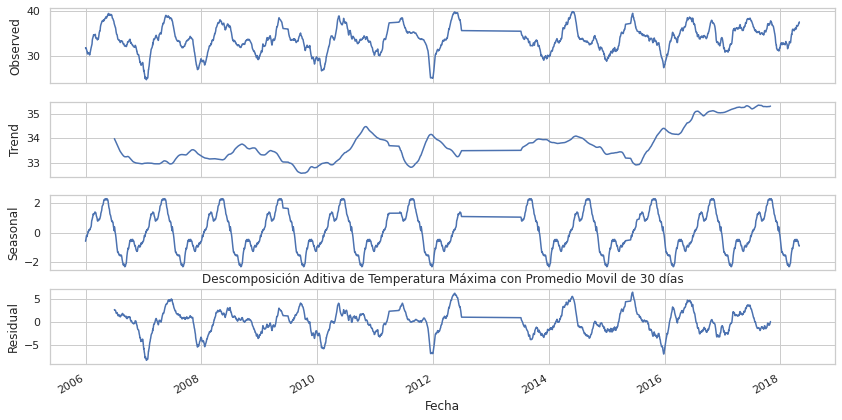

In [31]:
# Descomposición de Series de Tiempo para Tmax, 30 dias prom movil
# Uso de la biblioteca 'statsmodel'
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

# Rango de datos
st, end = "2006", "2018"

# Ciclo anual (por las estaciones)
freq1=365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
g = sm.tsa.seasonal_decompose(df30.loc[st:end, "Tmax"].interpolate(), freq=freq1, model="additive" )
g.plot()
plt.title("Descomposición Aditiva de Temperatura Máxima con Promedio Movil de 30 días");

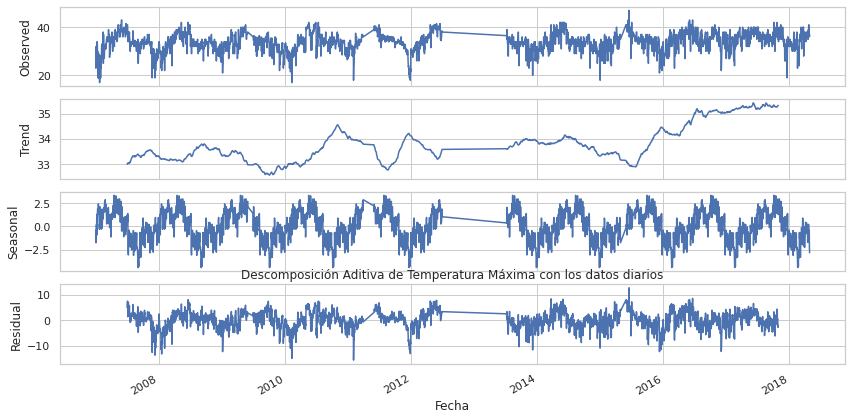

In [32]:
# Descomposición de Series de Tiempo para Tmax, datos diarios
# Uso de la biblioteca 'statsmodel'
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

# Rango de datos
st, end = "2007", "2018"

# Ciclo anual
freq1=365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
g = sm.tsa.seasonal_decompose(df_muestra.loc[st:end, "Tmax"].interpolate(), freq=freq1, model="additive" )
g.plot()
plt.title("Descomposición Aditiva de Temperatura Máxima con los datos diarios");

La temperatura máxima promedio es: 33.67222716928861


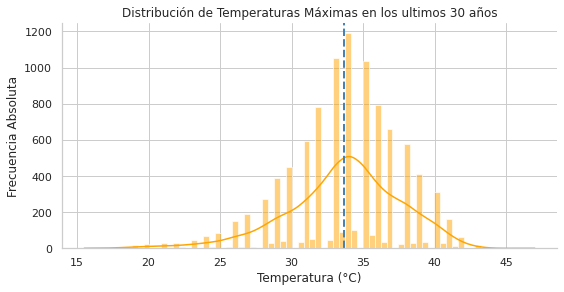

In [33]:
# Grafica de distribuciónes para Tmax

g1 = sns.displot(df_muestra.Tmax, kde=True, color="orange", height=4, aspect=2)
plt.axvline(x=df_muestra.Tmax.mean(), linestyle="--", linewidth=2, color="steelblue");

plt.title("Distribución de Temperaturas Máximas en los ultimos 30 años")
plt.ylabel("Frecuencia Absoluta")
plt.xlabel("Temperatura (°C)");
print(f"La temperatura máxima promedio es: {df_muestra.Tmax.mean()}")

La temperatura mínima promedio es: 15.474124282604393


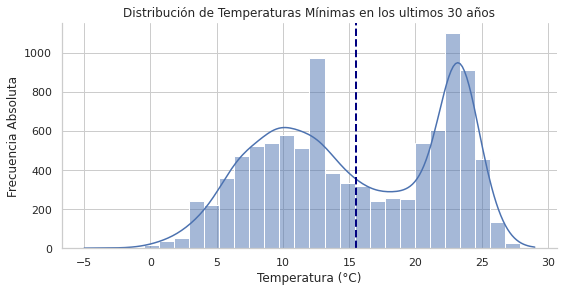

In [34]:
# Distribución para Tmin
g2 = sns.displot(df_muestra.Tmin, kde=True, height=4, aspect=2)
plt.axvline(x=df_muestra.Tmin.mean(), linestyle="--", linewidth=2, color="navy");

plt.title("Distribución de Temperaturas Mínimas en los ultimos 30 años")
plt.ylabel("Frecuencia Absoluta")
plt.xlabel("Temperatura (°C)");
print(f"La temperatura mínima promedio es: {df_muestra.Tmin.mean()}")

La evaporación promedio es: 5.211267605633813


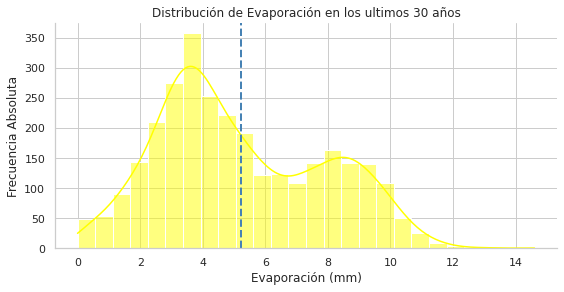

In [35]:
# Para la evaporación:
g3 = sns.displot(df_muestra.Evap, kde=True, color="yellow", height=4, aspect=2)
plt.axvline(x=df_muestra.Evap.mean(), linestyle="--", linewidth=2, color="steelblue");

plt.title("Distribución de Evaporación en los ultimos 30 años")
plt.ylabel("Frecuencia Absoluta")
plt.xlabel("Evaporación (mm)");
print(f"La evaporación promedio es: {df_muestra.Evap.mean()}")